### Parsing the JSON ###

In [1]:
import json
import pandas as pd
from datetime import datetime
import csv

In [2]:
# Opening JSON file
f = open('factures_humerphyto.json')
info=json.load(f)

In [3]:
print(json.dumps(info,indent =4 )) #visualiser dans le notebook (autre que l'ouvrir avec notepad)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
len(info) #827 factures de janvier 2019 à décembre 2021

826

In [5]:
info[0]["productQtys"] #Quantités des produits de la facture 0          #exemple d'accés à un dict d'éléments

[{'createdAt': '1976-01-27T14:25:15Z',
  'identifier': '-1312628223000',
  'product': {'createdAt': '2020-08-12T13:15:44.714Z',
   'identifier': '-925551972000',
   'price': 12,
   'name': 'HUMER Phyto AppÃ©tit sirop 125ml',
   'description': 'HUMER Phyto AppÃ©tit sirop 125ml',
   'id': 38600},
  'quantity': 70,
  'numLot': None,
  'price': 10.6,
  'name': 'HUMER Phyto AppÃ©tit sirop 125ml',
  'dateExp': '2020-09-17T04:39:34.980Z',
  'id': 1035550,
  'remise': 12},
 {'createdAt': '1934-08-29T20:15:04Z',
  'identifier': '-335581937000',
  'product': {'createdAt': '2020-08-12T13:15:41.449Z',
   'identifier': '-1834958532000',
   'price': 10.6,
   'name': 'HUMER Phyto Dentition sirop 125ml',
   'description': 'HUMER Phyto Dentition sirop 125ml',
   'id': 38350},
  'quantity': 70,
  'numLot': None,
  'price': 9.9,
  'name': 'HUMER Phyto Dentition sirop 125ml',
  'dateExp': '2020-09-17T04:39:34.980Z',
  'id': 1035500,
  'remise': 12},
 {'createdAt': '2004-03-15T16:02:11Z',
  'identifier': '

In [6]:
info[0]["productQtys"][0]['product']['price']#le prix originale d'un produit #exemple d'accés

12

In [7]:
round(info[0]["productQtys"][0]['product']['price']-(info[0]["productQtys"][0]['product']['price']*(info[0]["productQtys"][0]['remise']/100)),1)==info[0]["productQtys"][0]['price'] 
#test de la formule de la remise , on remarque l'arrondissement des chiffres de la 1ére virgule

True

on va commencer par la création des 3 dataframes et les remplir par les infos du premiére facture comme exemple:<br>
    -Client<br>
    -Facture<br>
    -Produit<br>
    

"client": {<br>
            "createdAt": "2020-05-19T21:28:38.349Z",<br>
            "identifier": "-1270355449000",<br>
            "address": "Zone Industrielle Monastir 5000",<br>
            "raisonSociale": "Tunisie Medicaments",<br>
            "madalite": null,<br>
            "matriculeFiscale": "1314202 J/P/M 000",<br>
            "id": 188450,<br>
            "email": null<br>
        }<br>

In [8]:
print(info[0]["client"]["madalite"])

None


In [9]:
from dataclasses import make_dataclass #on crée un object client , les df ont la possibilité d'omporter les champs directement
Client = make_dataclass("Client", [("Création", str),("Identifier", int),("adress", str),("raisonSociale", object),("madalite", str),("matriculeFiscale", str),("ID", int),("email", object)])

In [10]:
C1=Client("2020-05-19T21:28:38.349Z",-1270355449000,"Zone Industrielle Monastir 5000","Tunisie Medicaments",None,"1314202 J/P/M 000",188450,None)
df_C=pd.DataFrame([C1])
df_C #dataFrame des clients

,Création,Identifier,adress,raisonSociale,madalite,matriculeFiscale,ID,email
0,2020-05-19T21:28:38.349Z,-1270355449000,Zone Industrielle Monastir 5000,Tunisie Medicaments,None,1314202 J/P/M 000,188450,None


In [11]:
C2=Client(info[0]["client"]["createdAt"],int(info[0]["client"]["identifier"]),info[0]["client"]["address"],info[0]["client"]["raisonSociale"],info[0]["client"]["madalite"],info[0]["client"]["matriculeFiscale"],info[0]["client"]["id"],info[0]["client"]["email"])
df_C.append(pd.DataFrame([C2]), ignore_index = True) #exemple de concatination d'un 2éme client

,Création,Identifier,adress,raisonSociale,madalite,matriculeFiscale,ID,email
0,2020-05-19T21:28:38.349Z,-1270355449000,Zone Industrielle Monastir 5000,Tunisie Medicaments,None,1314202 J/P/M 000,188450,None
1,2020-05-19T21:28:38.349Z,-1270355449000,Zone Industrielle Monastir 5000,Tunisie Medicaments,None,1314202 J/P/M 000,188450,None


In [12]:
df_C = df_C.drop(0, axis=0) #remettre le df à 0
df_C

,Création,Identifier,adress,raisonSociale,madalite,matriculeFiscale,ID,email


In [13]:
S_C=list() #liste des clients distincts (S pour "set" mais la SD est List)
for i in range(826): #pour chaque facture i
    df_C=df_C.append(pd.DataFrame([Client(info[i]["client"]["createdAt"],int(info[i]["client"]["identifier"]),info[i]["client"]["address"],info[i]["client"]["raisonSociale"],info[i]["client"]["madalite"],info[i]["client"]["matriculeFiscale"],info[i]["client"]["id"],info[i]["client"]["email"])]), ignore_index = True)
    df_C["ID facture"]=info[i]['identifier'] #ajouter la clé étrangére ID facture
    if info[i]["client"]["id"] not in S_C:
        S_C.append(info[i]["client"]["id"]) #ajouter les client à la listes des clients distincts
df_C

,Création,Identifier,adress,raisonSociale,madalite,matriculeFiscale,ID,email,ID facture
0,2020-05-19T21:28:38.349Z,-1270355449000,Zone Industrielle Monastir 5000,Tunisie Medicaments,None,1314202 J/P/M 000,188450,None,164276473000
1,2020-10-16T14:03:12.048Z,-1152597577000,"Rue Mohamed Eddorra 8062 Nabeul, Tunisie",Cabdephar para,None,1495767 Y/A/M 000,188900,None,164276473000
2,2020-05-19T21:28:38.349Z,-1270355449000,Zone Industrielle Monastir 5000,Tunisie Medicaments,None,1314202 J/P/M 000,188450,None,164276473000
3,2020-05-19T21:28:35.365Z,136522309000,"Avenue Majida Boulila, SFAX JADIDA 3027",SOPROPHA SFAX,None,004018D/P/M 000,189950,None,164276473000
4,2020-05-19T21:28:35.365Z,136522309000,"Avenue Majida Boulila, SFAX JADIDA 3027",SOPROPHA SFAX,None,004018D/P/M 000,189950,None,164276473000
...,...,...,...,...,...,...,...,...,...
821,2020-05-19T21:28:36.502Z,-1435038581000,Rue de l'environnement 3005 Kairouan,Medika Kairouan,None,022440/R/P/M000,189900,None,164276473000
822,2020-05-19T21:28:35.365Z,136522309000,"Avenue Majida Boulila, SFAX JADIDA 3027",SOPROPHA SFAX,None,004018D/P/M 000,189950,None,164276473000
823,2020-10-16T11:55:57.800Z,1789596924000,"Avenue El Farabi, Dar Chaabane El Fehri, Nabeul",Galien,None,1282400 L/A/M 000,190250,None,164276473000
824,2020-10-16T14:03:12.048Z,-1152597577000,"Rue Mohamed Eddorra 8062 Nabeul, Tunisie",Cabdephar para,None,1495767 Y/A/M 000,188900,None,164276473000


In [14]:
print(S_C)
print("we have : ",len(S_C),"Clients") #cisualiser le nombre de clients

[188450, 188900, 189950, 188700, 189900, 189000, 188100, 189300, 189050, 190350, 189350, 189750, 188350, 189400, 190250, 190450, 189100, 189700, 189450, 190200, 188750, 190300, 189650, 190500, 189150, 188400, 188600, 188550, 188650, 188200, 189500, 189250, 188500, 188800, 189200, 190400, 188850, 190050, 188150, 188300, 188250]
we have :  41 Clients


### DF produit :

'product': {'createdAt': '2020-08-12T13:15:44.714Z',<br>
   'identifier': '-925551972000',<br>
   'price': 12,<br>
   'name': 'HUMER Phyto AppÃ©tit sirop 125ml',<br>
   'description': 'HUMER Phyto AppÃ©tit sirop 125ml',<br>
   'id': 38600},

In [15]:
info[0]['productQtys'][0]["product"]['createdAt'] #exemple d'accés et vérification de types 

'2020-08-12T13:15:44.714Z'

In [16]:
from dataclasses import make_dataclass #meme procédure de créationde classe
Product = make_dataclass("Produit", [("Création", str),("Identifier", int),("price", float),("name", str),("desc", str),("ID", int)])

In [17]:
P1=Product(info[0]['productQtys'][0]["product"]['createdAt'],
           int(info[0]['productQtys'][0]["product"]['identifier']),
           float(info[0]['productQtys'][0]["product"]['price']),
           info[0]['productQtys'][0]["product"]['name'],
          info[0]['productQtys'][0]["product"]['description'],
           info[0]['productQtys'][0]["product"]['id'])
df_P=pd.DataFrame([P1])
df_P

,Création,Identifier,price,name,desc,ID
0,2020-08-12T13:15:44.714Z,-925551972000,12.0,HUMER Phyto AppÃ©tit sirop 125ml,HUMER Phyto AppÃ©tit sirop 125ml,38600


In [18]:
info[0]['productQtys'][2]["product"]['createdAt']

'2020-08-12T13:15:39.763Z'

In [19]:
P1=Product(info[0]['productQtys'][0]["product"]['createdAt'],
           int(info[0]['productQtys'][0]["product"]['identifier']),
           float(info[0]['productQtys'][0]["product"]['price']),
           info[0]['productQtys'][0]["product"]['name'],
          info[0]['productQtys'][0]["product"]['description'],
           info[0]['productQtys'][0]["product"]['id'])

In [20]:
df_P = df_P.drop(0, axis=0)
df_P

,Création,Identifier,price,name,desc,ID


In [21]:
info[0]["productQtys"][1] #Quantités des produits de la facture 0 #en particulier le 2éme produit(indexé 1)

{'createdAt': '1934-08-29T20:15:04Z',
 'identifier': '-335581937000',
 'product': {'createdAt': '2020-08-12T13:15:41.449Z',
  'identifier': '-1834958532000',
  'price': 10.6,
  'name': 'HUMER Phyto Dentition sirop 125ml',
  'description': 'HUMER Phyto Dentition sirop 125ml',
  'id': 38350},
 'quantity': 70,
 'numLot': None,
 'price': 9.9,
 'name': 'HUMER Phyto Dentition sirop 125ml',
 'dateExp': '2020-09-17T04:39:34.980Z',
 'id': 1035500,
 'remise': 12}

In [22]:
S_P=list() #liste des produits distincts
for i in range(826): #facture i
    for j in range(len(info[i]['productQtys'])): #le produit j mentionné dans la facture
        df_P=df_P.append([pd.DataFrame([Product(info[i]['productQtys'][j]["product"]['createdAt'],
                                                int(info[i]['productQtys'][j]["product"]['identifier']),
                                                float(info[i]['productQtys'][j]["product"]['price']),
                                                info[i]['productQtys'][j]["product"]['name'],
                                                info[i]['productQtys'][j]["product"]['description'],
                                                int(info[i]['productQtys'][j]["product"]['id']))])], ignore_index = True)
        if int(info[i]['productQtys'][j]["product"]['id']) not in S_P :
            S_P.append(int(info[i]['productQtys'][j]["product"]['id']))#ajouter les produits distincts
print(S_P)
print("we have : ",len(S_P),"Products")#visualiser le nombre de produit
df_P

[38600, 38350, 38500, 38400, 38550, 38450, 38650, 38300]
we have :  8 Products


,Création,Identifier,price,name,desc,ID
0,2020-08-12T13:15:44.714Z,-925551972000,12.00,HUMER Phyto AppÃ©tit sirop 125ml,HUMER Phyto AppÃ©tit sirop 125ml,38600
1,2020-08-12T13:15:41.449Z,-1834958532000,10.60,HUMER Phyto Dentition sirop 125ml,HUMER Phyto Dentition sirop 125ml,38350
2,2020-08-12T13:15:39.763Z,-2014021934000,19.00,HUMER Phyto OMEGA3 sirop 125ml,HUMER Phyto OMEGA3 sirop 125ml,38500
3,2020-08-12T13:15:42.979Z,-239404150000,8.50,HUMER Phyto toux grasse sirop 125ml,HUMER Phyto toux grasse sirop 125ml,38400
4,2020-08-12T13:15:35.931Z,1915070122000,8.30,HUMER Phyto Rhume toux sÃ©che sirop 125ml,HUMER Phyto Rhume toux sÃ©che sirop 125ml,38550
...,...,...,...,...,...,...
2788,2020-08-12T13:15:46.262Z,878065739000,9.15,HUMER Phyto Gastro sirop 125ml,HUMER Phyto Gastro sirop 125ml,38650
2789,2020-08-12T13:15:44.714Z,-925551972000,12.00,HUMER Phyto AppÃ©tit sirop 125ml,HUMER Phyto AppÃ©tit sirop 125ml,38600
2790,2020-08-12T13:15:42.979Z,-239404150000,8.50,HUMER Phyto toux grasse sirop 125ml,HUMER Phyto toux grasse sirop 125ml,38400
2791,2020-08-12T13:15:35.931Z,1915070122000,8.30,HUMER Phyto Rhume toux sÃ©che sirop 125ml,HUMER Phyto Rhume toux sÃ©che sirop 125ml,38550


### DF Facture :

In [23]:
info[0]["status"] #exemple d'accés et remarque de variable catégorique

'accepte'

In [24]:
from dataclasses import make_dataclass
Facture = make_dataclass("Facture", 
[
    ("date",str),
        ("reference",int),
        ("paymentDelay", str),
        ("createdAt",str),
        ("identifier", str),
        ("paymentMethod", str),
        ("paye",bool),
        ("client", int),
        ("numeroCheque", object),
        ("ID_Produits", object) ,#liste des produits
        ("id",int),
        ('status',str)
])

In [25]:
def Dic(R): #Helper function . permet de remplacer l'accés au sous dict productQtys à un accés à la clé étrangére Product ID de la facture R
    D=dict()
    L=dict()
    D=info[R]["productQtys"]
    for i in range(1,len(info[R]["productQtys"])):
        ch="Produit "+str(i)
        L[D[i]['product']["id"]]=D[i]["quantity"]
    D=L
    return D

F1=Facture(info[0]["date"],
           int(info[0]["reference"]),
           info[0]["paymentDelay"],
           info[0]["createdAt"],
           info[0]["identifier"],
           info[0]["paymentMethod"],
           info[0]["paye"],
           info[0]["client"]["id"],
           info[0]["numeroCheque"],
           Dic(0),
           info[0]["id"],info[0]["status"]=="accepte")
df_F=pd.DataFrame([F1])
df_F

,date,reference,paymentDelay,createdAt,identifier,paymentMethod,paye,client,numeroCheque,ID_Produits,id,status
0,2020-02-21T12:35:32.068Z,1000247,2021-08-08T00:16:46.169Z,2020-02-21T12:36:13.068Z,1666239562000,check,True,188450,None,"{38350: 70, 38500: 48}",1035650,True


In [26]:
df_F = df_F.drop(0, axis=0) #clearing the dataframe
df_F

,date,reference,paymentDelay,createdAt,identifier,paymentMethod,paye,client,numeroCheque,ID_Produits,id,status


In [27]:
for i in range(826): #ajouter la facture i avec les product IDs et Clients IDs comme clés étrangéres 
    df_F=df_F.append(
        [pd.DataFrame([Facture(info[i]["date"],
           int(info[i]["reference"]),
           info[i]["paymentDelay"],
           info[i]["createdAt"],
           info[i]["identifier"],
           info[i]["paymentMethod"],
           info[i]["paye"],
           info[i]["client"]["id"],
           info[i]["numeroCheque"],
           Dic(i),
           info[0]["id"],info[0]["status"]=="accepte")])])
df_F

,date,reference,paymentDelay,createdAt,identifier,paymentMethod,paye,client,numeroCheque,ID_Produits,id,status
0,2020-02-21T12:35:32.068Z,1000247,2021-08-08T00:16:46.169Z,2020-02-21T12:36:13.068Z,1666239562000,check,True,188450,None,"{38350: 70, 38500: 48}",1035650,True
0,2021-01-02T23:00:00Z,1100008,2021-04-12T23:00:00Z,2021-01-05T08:56:54.181Z,-1187824257000,traite,True,188900,None,"{38550: 48, 38450: 96, 38650: 48, 38300: 24, 3...",1035650,True
0,2021-01-26T23:00:00Z,1100031,2021-04-26T22:00:00Z,2021-01-28T11:30:19.707Z,-2080658422000,traite,True,188450,None,{38500: 48},1035650,True
0,2019-11-14T12:14:03.068Z,1000182,2021-08-08T00:16:47.362Z,2019-11-14T12:14:03.068Z,-992794964000,check,True,189950,None,"{38550: 24, 38600: 96}",1035650,True
0,2019-02-14T17:09:11.068Z,1000030,2021-08-08T00:16:47.660Z,2019-02-14T17:09:11.068Z,-1766696871000,check,True,189950,None,{38400: 192},1035650,True
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-12-21T23:00:00Z,1100395,2021-12-31T16:34:03.281Z,2021-12-21T11:47:11.140Z,1416995850000,nonReglee,False,189900,None,{},1035650,True
0,2021-12-21T23:00:00Z,1100396,2021-12-31T16:34:06.125Z,2021-12-21T11:48:38.454Z,1090433897000,nonReglee,False,189950,None,{},1035650,True
0,2021-12-25T23:00:00Z,1100397,2022-02-25T23:00:00Z,2021-12-25T11:53:34.371Z,473931144000,traite,False,190250,None,"{38350: 12, 38550: 12, 38600: 12, 38400: 12, 3...",1035650,True
0,2021-12-25T23:00:00Z,1100398,2022-02-20T23:00:00Z,2021-12-25T12:02:12.457Z,-794931613000,traite,False,188900,None,{38400: 96},1035650,True


In [28]:
#enregistrement des Dataframes
df_C.to_csv('Clients.csv')
df_F.to_csv('Factures.csv')
df_P.to_csv('Produits.csv')

In [29]:
Date_L_=[i[:7] for i in df_F["date"][0].tolist()]
Date_L_=pd.Series(Date_L_)
df_F["date"][0]=Date_L_
df_F

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,reference,paymentDelay,createdAt,identifier,paymentMethod,paye,client,numeroCheque,ID_Produits,id,status
0,2020-02,1000247,2021-08-08T00:16:46.169Z,2020-02-21T12:36:13.068Z,1666239562000,check,True,188450,None,"{38350: 70, 38500: 48}",1035650,True
0,2021-01,1100008,2021-04-12T23:00:00Z,2021-01-05T08:56:54.181Z,-1187824257000,traite,True,188900,None,"{38550: 48, 38450: 96, 38650: 48, 38300: 24, 3...",1035650,True
0,2021-01,1100031,2021-04-26T22:00:00Z,2021-01-28T11:30:19.707Z,-2080658422000,traite,True,188450,None,{38500: 48},1035650,True
0,2019-11,1000182,2021-08-08T00:16:47.362Z,2019-11-14T12:14:03.068Z,-992794964000,check,True,189950,None,"{38550: 24, 38600: 96}",1035650,True
0,2019-02,1000030,2021-08-08T00:16:47.660Z,2019-02-14T17:09:11.068Z,-1766696871000,check,True,189950,None,{38400: 192},1035650,True
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-12,1100395,2021-12-31T16:34:03.281Z,2021-12-21T11:47:11.140Z,1416995850000,nonReglee,False,189900,None,{},1035650,True
0,2021-12,1100396,2021-12-31T16:34:06.125Z,2021-12-21T11:48:38.454Z,1090433897000,nonReglee,False,189950,None,{},1035650,True
0,2021-12,1100397,2022-02-25T23:00:00Z,2021-12-25T11:53:34.371Z,473931144000,traite,False,190250,None,"{38350: 12, 38550: 12, 38600: 12, 38400: 12, 3...",1035650,True
0,2021-12,1100398,2022-02-20T23:00:00Z,2021-12-25T12:02:12.457Z,-794931613000,traite,False,188900,None,{38400: 96},1035650,True


In [30]:
def TransformDate_Series(df,string): #automatiser le formatage des dates :jusqu'au mois pour la SD pd.series
    Date_L_=[i[:7] for i in df[string][0].tolist()]
    Date_L_=pd.Series(Date_L_, copy=False)
    df[string][0]=Date_L_
    
def TransformDate_String(df,string): #automatiser le formatage des dates :jusqu'au mois pour la SD String
    Date_L_=[i[:7] for i in df[string].tolist()]
    Date_L_=pd.Series(Date_L_, copy=False)
    df[string]=Date_L_
    

In [31]:
TransformDate_Series(df_F,"paymentDelay") #formattage dates
TransformDate_Series(df_F,"createdAt")

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [32]:
df_P["Création"] #formattage dates
TransformDate_String(df_P,"Création")

In [33]:
TransformDate_String(df_C,"Création") #formattage dates

In [34]:
df_F

,date,reference,paymentDelay,createdAt,identifier,paymentMethod,paye,client,numeroCheque,ID_Produits,id,status
0,2020-02,1000247,2021-08,2020-02,1666239562000,check,True,188450,None,"{38350: 70, 38500: 48}",1035650,True
0,2021-01,1100008,2021-04,2021-01,-1187824257000,traite,True,188900,None,"{38550: 48, 38450: 96, 38650: 48, 38300: 24, 3...",1035650,True
0,2021-01,1100031,2021-04,2021-01,-2080658422000,traite,True,188450,None,{38500: 48},1035650,True
0,2019-11,1000182,2021-08,2019-11,-992794964000,check,True,189950,None,"{38550: 24, 38600: 96}",1035650,True
0,2019-02,1000030,2021-08,2019-02,-1766696871000,check,True,189950,None,{38400: 192},1035650,True
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2021-12,1100395,2021-12,2021-12,1416995850000,nonReglee,False,189900,None,{},1035650,True
0,2021-12,1100396,2021-12,2021-12,1090433897000,nonReglee,False,189950,None,{},1035650,True
0,2021-12,1100397,2022-02,2021-12,473931144000,traite,False,190250,None,"{38350: 12, 38550: 12, 38600: 12, 38400: 12, 3...",1035650,True
0,2021-12,1100398,2022-02,2021-12,-794931613000,traite,False,188900,None,{38400: 96},1035650,True


### making the ML dataframe<br>
format d'un dataframe multi-index: Client->produit->date->Quantité

In [35]:
#1ére Idée : créer un dataframe multi-indexé
I1=S_C
I2=S_P
I3=df_F["date"][0].tolist()
Index=I1,I2,I3

In [36]:
import numpy as np
arrays =[I1,I2,I3]
tuples = list(zip(*arrays))
index_ = pd.MultiIndex.from_tuples(tuples, names=["Client","Produit","Date"])
s=pd.Series(np.random.randn(8), index=index_)
result = pd.DataFrame(s)
result

,,,0
Client,Produit,Date,
188450,38600,2020-02,0.054890
188900,38350,2021-01,-0.120691
189950,38500,2021-01,0.384131
188700,38400,2019-11,1.340578
189900,38550,2019-02,0.427395
189000,38450,2020-03,0.525413
188100,38650,2020-11,0.877616
189300,38300,2020-01,-1.926058


In [37]:
Pr_List=df_F["ID_Produits"].tolist()
Pr_List[0].values()

dict_values([70, 48])

In [38]:
#2éme idée : faire le produit cartésien de toutes les combinaisons de client ,produits et dates puis remplir avec les données de la facture
import itertools
somelists = [I1,I2,I3]
Index_=list()
for element in itertools.product(*somelists):
    Index_.append(list(element))

In [39]:
df = pd.DataFrame({"Client":I1}) #initiation d'un dataframe
df1 = pd.DataFrame(
    Index_,columns=["Client", "Produit","Date"])#passage du multi index et noms de colonnes
df1["Quantité"]=None #la colonne value/quantité , difficultés au niveau remplissage
df1

,Client,Produit,Date,Quantité
0,188450,38600,2020-02,None
1,188450,38600,2021-01,None
2,188450,38600,2021-01,None
3,188450,38600,2019-11,None
4,188450,38600,2019-02,None
...,...,...,...,...
270923,188250,38300,2021-12,None
270924,188250,38300,2021-12,None
270925,188250,38300,2021-12,None
270926,188250,38300,2021-12,None


In [40]:
#3éme idée : brute force ,index simple
import copy
df2=copy.deepcopy(df1) #df2=df1 crée une relation entre les deux .avec cette méthode df2 est indépendant de df1
df2.drop(df2.index, inplace=True)
c=0
for Fac in range(len(info)) : #on va remplir le tableau par les valeurs correspondates au produit cartésien
    for j in range(len(info[Fac]["productQtys"])):
        df2.at[c+j,'Client']=int(info[Fac]["client"]["id"])
        df2.at[c+j,'Produit']=int(info[Fac]["productQtys"][j]["product"]["id"])
        df2.at[c+j,'Date']=info[Fac]["date"][:10]
        df2.at[c+j,'Quantité']=info[Fac]["productQtys"][j]["quantity"]
    c=c+len(info[Fac]["productQtys"])
df2

,Client,Produit,Date,Quantité
0,188450.0,38600.0,2020-02-21,70
1,188450.0,38350.0,2020-02-21,70
2,188450.0,38500.0,2020-02-21,48
3,188900.0,38400.0,2021-01-02,96
4,188900.0,38550.0,2021-01-02,48
...,...,...,...,...
2788,188550.0,38650.0,2021-12-27,96
2789,188550.0,38600.0,2021-12-27,48
2790,188550.0,38400.0,2021-12-27,48
2791,188550.0,38550.0,2021-12-27,48


In [41]:
df2.groupby(["Client"]) #groupe par client
df2.sort_values("Date") #tri par date
df2.tail(50) #vérification du tri et groupe by

,Client,Produit,Date,Quantité
2743,188850.0,38300.0,2021-12-09,48
2744,190200.0,38400.0,2021-12-09,240
2745,188900.0,38400.0,2021-12-09,96
2746,188900.0,38650.0,2021-12-09,48
2747,188900.0,38450.0,2021-12-09,48
2748,188900.0,38500.0,2021-12-09,48
2749,189950.0,38500.0,2021-12-09,336
2750,189950.0,38650.0,2021-12-09,240
2751,189950.0,38600.0,2021-12-09,336
2752,189950.0,38300.0,2021-12-09,240


In [42]:
df2[(df2['Client']==190250.0)&(df2["Produit"]==38400.0)].sort_values("Date") #exemple d'accés à une série temporelle d'un client et un produit

,Client,Produit,Date,Quantité
269,190250.0,38400.0,2020-10-16,24
91,190250.0,38400.0,2020-11-10,24
1310,190250.0,38400.0,2020-12-02,24
1009,190250.0,38400.0,2021-01-03,48
1183,190250.0,38400.0,2021-03-01,48
1596,190250.0,38400.0,2021-04-06,48
1776,190250.0,38400.0,2021-05-27,24
1790,190250.0,38400.0,2021-06-01,48
1851,190250.0,38400.0,2021-06-16,60
2160,190250.0,38400.0,2021-09-09,48


In [43]:
def extract_TS(No_C,No_P): #Helper Function. permet d'automatiser l'extraction de Série temporelles des Client ID et produict ID 
    assert(No_C in S_C)#vérification du numéro
    assert(No_P in S_P)#vérification du numéro
    x=copy.deepcopy(df2[(df2['Client']==No_C)&(df2["Produit"]==No_P)])#ne touche pas au DF originale
    x=x[["Date","Quantité"]]
    x.set_index('Date', inplace=True)
    return x

In [44]:
def File_my_TS():#enregister les séries temporelles pour parcours uen fois le pipeline modélisation est pret 
    start_time = datetime.now()
    for i in S_C:
        for j in S_P:
                #prepare file & path name 
                ch=str(i)+'-'+str(j)+".csv"  #<ClientID>-<ProductID>.csv sera le nom des fichiers contentant Date , Quantité
                path=str('''./Time-series/''')+ ch #enregistrement dans ce dossier
                #get specific TS & save
                df=extract_TS(i,j)
                df.sort_values("Date").to_csv(path) 
                
                #log file progress
                end_time = datetime.now()
                string=format(end_time - start_time)
                print(ch ,"done" ,string) #logging progress

In [45]:
File_my_TS()

188450-38600.csv done 0:00:00.272140
188450-38350.csv done 0:00:00.277140
188450-38500.csv done 0:00:00.277140
188450-38400.csv done 0:00:00.282137
188450-38550.csv done 0:00:00.282137
188450-38450.csv done 0:00:00.287141
188450-38650.csv done 0:00:00.291210
188450-38300.csv done 0:00:00.294815
188900-38600.csv done 0:00:00.311910
188900-38350.csv done 0:00:00.311910
188900-38500.csv done 0:00:00.316907
188900-38400.csv done 0:00:00.321904
188900-38550.csv done 0:00:00.326910
188900-38450.csv done 0:00:00.331921
188900-38650.csv done 0:00:00.331921
188900-38300.csv done 0:00:00.336905
189950-38600.csv done 0:00:00.341900
189950-38350.csv done 0:00:00.346891
189950-38500.csv done 0:00:00.346891
189950-38400.csv done 0:00:00.351889
189950-38550.csv done 0:00:00.356885
189950-38450.csv done 0:00:00.361891
189950-38650.csv done 0:00:00.361891
189950-38300.csv done 0:00:00.366880
188700-38600.csv done 0:00:00.371883
188700-38350.csv done 0:00:00.376874
188700-38500.csv done 0:00:00.376874
1

189250-38600.csv done 0:00:01.014640
189250-38350.csv done 0:00:01.018229
189250-38500.csv done 0:00:01.019390
189250-38400.csv done 0:00:01.019390
189250-38550.csv done 0:00:01.024388
189250-38450.csv done 0:00:01.029386
189250-38650.csv done 0:00:01.029386
189250-38300.csv done 0:00:01.034383
188500-38600.csv done 0:00:01.034383
188500-38350.csv done 0:00:01.039421
188500-38500.csv done 0:00:01.039421
188500-38400.csv done 0:00:01.044380
188500-38550.csv done 0:00:01.049374
188500-38450.csv done 0:00:01.049374
188500-38650.csv done 0:00:01.054405
188500-38300.csv done 0:00:01.054405
188800-38600.csv done 0:00:01.059370
188800-38350.csv done 0:00:01.059370
188800-38500.csv done 0:00:01.064367
188800-38400.csv done 0:00:01.064367
188800-38550.csv done 0:00:01.072229
188800-38450.csv done 0:00:01.076251
188800-38650.csv done 0:00:01.078248
188800-38300.csv done 0:00:01.081203
189200-38600.csv done 0:00:01.084196
189200-38350.csv done 0:00:01.087187
189200-38500.csv done 0:00:01.090180
1

In [46]:
df=extract_TS(190250.0,38400).sort_values("Date")
df

,Quantité
Date,
2020-10-16,24
2020-11-10,24
2020-12-02,24
2021-01-03,48
2021-03-01,48
2021-04-06,48
2021-05-27,24
2021-06-01,48
2021-06-16,60


### 2- Creating a pipeline for modeling

In [ ]:
# vu que le sample size/données sont insuffisant pour un produit donné et un client donné l'analyse TS n'est pas justifié
#les achats ne sont pas espacés identiquement #https://traces.readthedocs.io/en/latest/ traces est une bibliothéque utile
#quelques clients ont arreté d'acheter (le probléme devient Churn de point de vue fournisseur) sickit-survival est une bibliothéque utile

### assuming this is a reguler[observations are evenly spaced] TS (Method 1:raw handling,Method2: filling business days with 0)

working on a single example:<br>
1/weak/strong stationarity<br>
2/ADF<br>
3/PACF<br>
4/ACF<br>
--->Arima<br>
5/Seasonal ?<br>
--->Sarima<br>
6/Scrape google trends : word 'toux'<br>
--->Sarimax <br>
7/--->compare with Auto-Arima <br>
	different metrics<br>
	Grid Search vs stepwise<br>
8/--->Arch , Garch for volatility<br>
9/--->Clients , sickit survival/lifelines<br>

In [47]:
from scipy.stats.distributions import chi2 
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest 

In [48]:
#METHOD 1 : This method will fail , instead we could suggest a simple linear model instead of TS analysis.
#Time series require at least 40-50 observations for meaningful forcasting
#Time series are usually regulerly spaced , we're dealing with an irregeluer TS. in

In [49]:
# Starting Date
start_date_str = df.index[0]
start_date = datetime.strptime(start_date_str,  '%Y-%m-%d').date()
# ending date
end_date_str = df.index[-1]
end_date=datetime.strptime(end_date_str, '%Y-%m-%d').date()

In [50]:
df #on fait le travail sur un DF

,Quantité
Date,
2020-10-16,24
2020-11-10,24
2020-12-02,24
2021-01-03,48
2021-03-01,48
2021-04-06,48
2021-05-27,24
2021-06-01,48
2021-06-16,60


In [51]:
    #assigning the frequency to business days
#df_new = df.asfreq('b')
    #checking for missing values 
print(df.isna().sum())
    #filling them with the last known value
#df_new = df_new.fillna(method='bfill')
    #rechecking for missing values 
print(df.isna().sum())

Quantité    0
dtype: int64
Quantité    0
dtype: int64


In [52]:
# Creating 1st difference
df["1st diff"]= list(df['Quantité'].pct_change(1).mul(100))
df

,Quantité,1st diff
Date,,
2020-10-16,24,NaN
2020-11-10,24,0.0
2020-12-02,24,0.0
2021-01-03,48,100.0
2021-03-01,48,0.0
2021-04-06,48,0.0
2021-05-27,24,-50.0
2021-06-01,48,100.0
2021-06-16,60,25.0


In [53]:
adf_result=sts.adfuller(df['Quantité'], maxlag=None, regression='ctt', autolag='AIC', store=True, regresults=True)
adf_result # 0.0612 > 0.05 :we conclude the TS is not stationary(rejecting the null hypothesis) at 5% level

(-3.754980039056574,
 0.06122126458496576,
 {'1%': -5.971601975957927,
  '5%': -4.561363478587529,
  '10%': -3.977447528174305},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1afad1a8f48>)

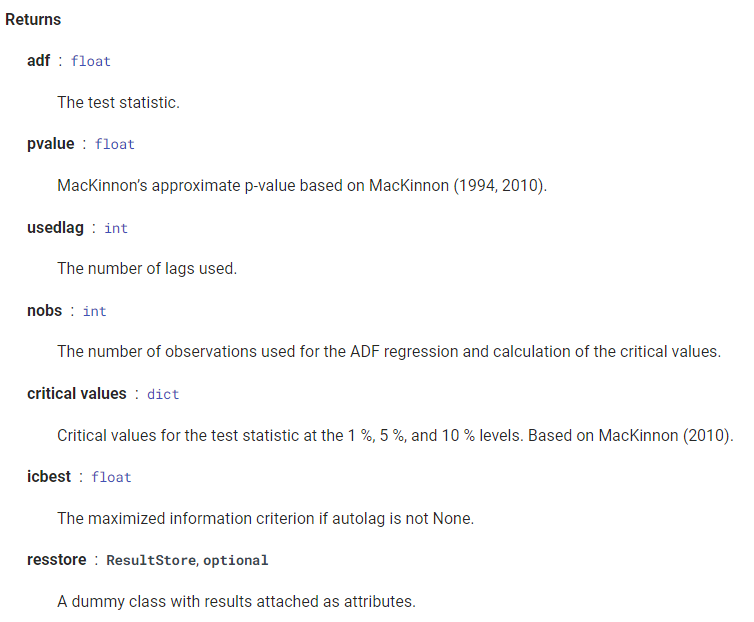

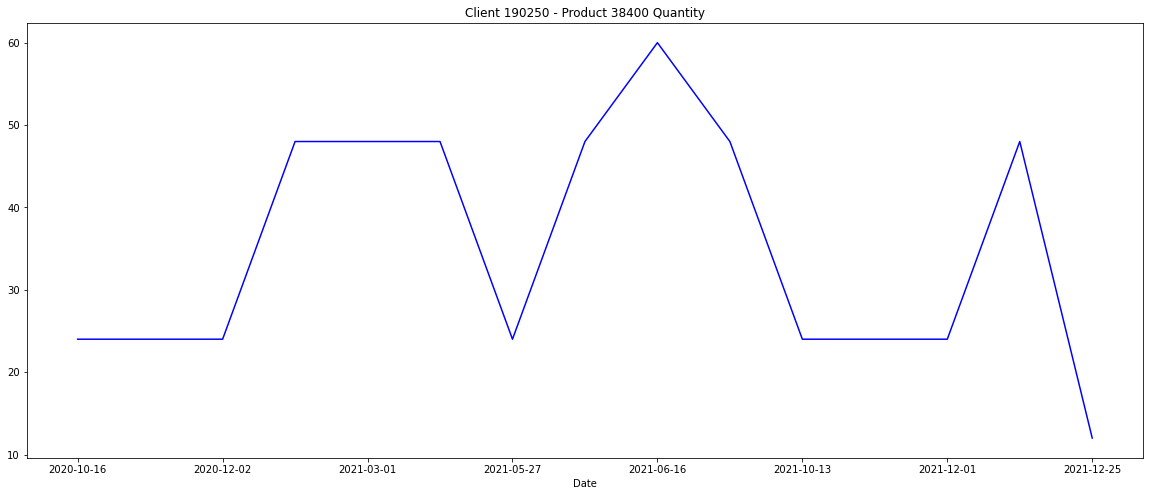

In [54]:
df["Quantité"].plot(figsize= (20,8), color = "blue") #visualisation . TO DO : create function
plt.title("Client 190250 - Product 38400 Quantity")
plt.show()

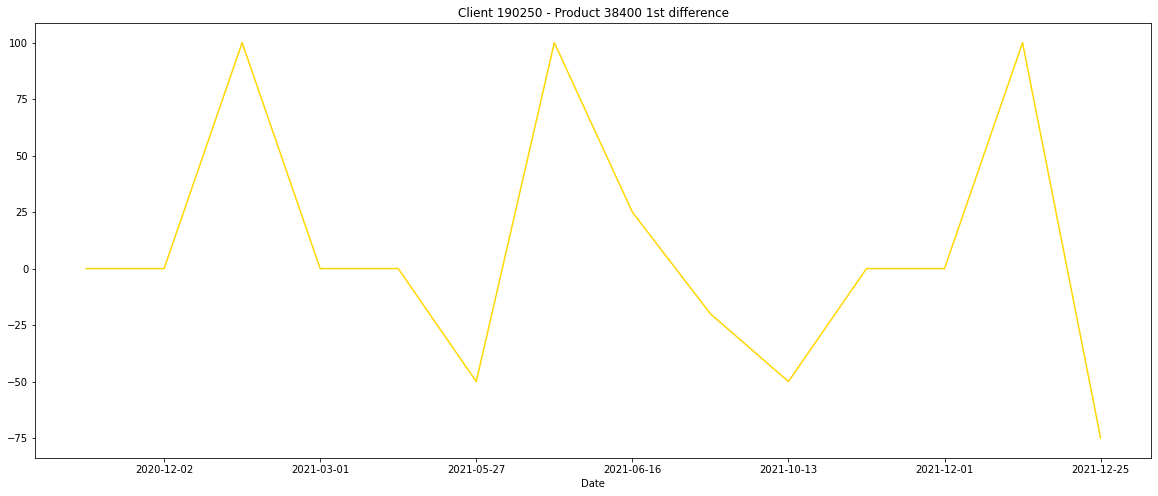

In [55]:
df["1st diff"].plot(figsize= (20,8), color = "gold")#visualisation . TO DO : create function
plt.title("Client 190250 - Product 38400 1st difference")
plt.show()

In [56]:
size = int(len(df["Quantité"])*0.8)
df.index[:size]#train dates
df.index[size:]#test dates

Index(['2021-12-01', '2021-12-14', '2021-12-25'], dtype='object', name='Date')

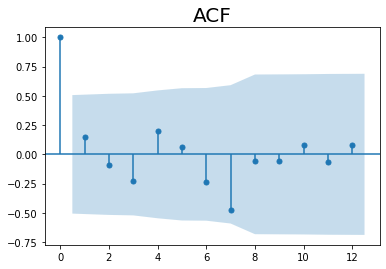

In [57]:
sgt.plot_acf(df["Quantité"],alpha=0.05)
plt.title("ACF",size=20)
plt.show()
#all the lags are insignificant 
#we would expect it the result to be mostly insignificant lags that resemble white noise when studying error terms

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 12 must be < 7.

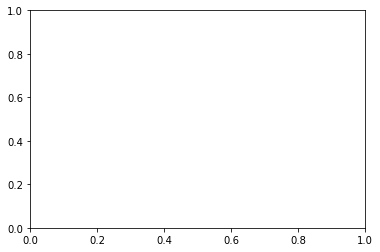

In [58]:
sgt.plot_pacf(df["Quantité"],alpha=0.05)
plt.title("ACF",size=20)
plt.show()
#all the lags are insignificant ?????????? meaning AR is perfect 

### Method 2 :

In [92]:
#assigning the frequency 
df_ = copy.deepcopy(df)
#df_=df_.asfreq('b') #to business days but we notice this company issues bills even on saturdays
df_=df_.asfreq('d') #daily frequency sundays and saturdays included #this makes the values NaN for some reason ???

In [93]:
df_

,Quantité,1st diff
Date,,
2020-10-16,NaN,NaN
2020-10-17,NaN,NaN
2020-10-18,NaN,NaN
2020-10-19,NaN,NaN
2020-10-20,NaN,NaN
...,...,...
2021-12-21,NaN,NaN
2021-12-22,NaN,NaN
2021-12-23,NaN,NaN


In [61]:
for i in range(len(df.index)):
    if df.index[i] in df_.index:
        df_.at[df.index[i],"Quantité"]=df.at[df.index[i],"Quantité"] #refilling the dataframe but now with all

In [62]:
df_.tail(5)

,Quantité,1st diff
Date,,
2021-12-21,NaN,NaN
2021-12-22,NaN,NaN
2021-12-23,NaN,NaN
2021-12-24,NaN,NaN
2021-12-25,12,NaN


In [63]:
df_ = df_.fillna(0) #filling the rest with 0 sales
df_

,Quantité,1st diff
Date,,
2020-10-16,24,0.0
2020-10-17,0,0.0
2020-10-18,0,0.0
2020-10-19,0,0.0
2020-10-20,0,0.0
...,...,...
2021-12-21,0,0.0
2021-12-22,0,0.0
2021-12-23,0,0.0


In [64]:
# Creating 1st difference
df_["1st diff"]= list(df_['Quantité'].diff(1))
df_

,Quantité,1st diff
Date,,
2020-10-16,24,NaN
2020-10-17,0,-24.0
2020-10-18,0,0.0
2020-10-19,0,0.0
2020-10-20,0,0.0
...,...,...
2021-12-21,0,0.0
2021-12-22,0,0.0
2021-12-23,0,0.0


In [65]:
adf_result=sts.adfuller(df_['Quantité'], maxlag=None, regression='ctt', autolag='AIC', store=True, regresults=True)
adf_result # 0.0612 > 0.05 :we conclude the TS is stationary(accepting the null hypothesis) at a 5% level

(-21.58725616078402,
 0.0,
 {'1%': -4.397962891658808,
  '5%': -3.8460337649213443,
  '10%': -3.561701617717763},
 <statsmodels.stats.diagnostic.ResultsStore at 0x1afadadb708>)

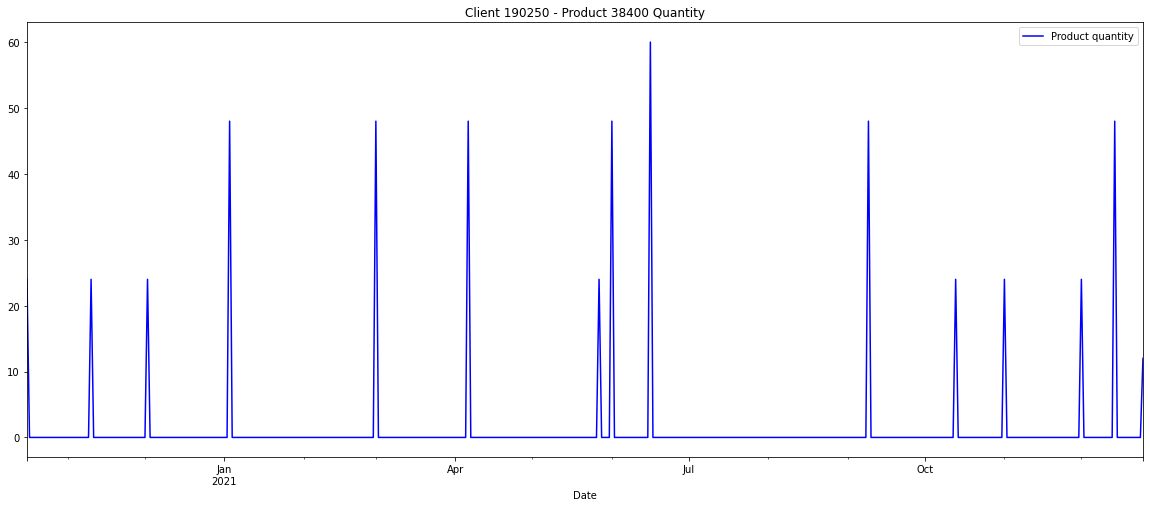

In [66]:
df_["Quantité"].plot(figsize= (20,8), color = "blue")
plt.title("Client 190250 - Product 38400 Quantity")
plt.legend(["Product quantity"])
plt.show()

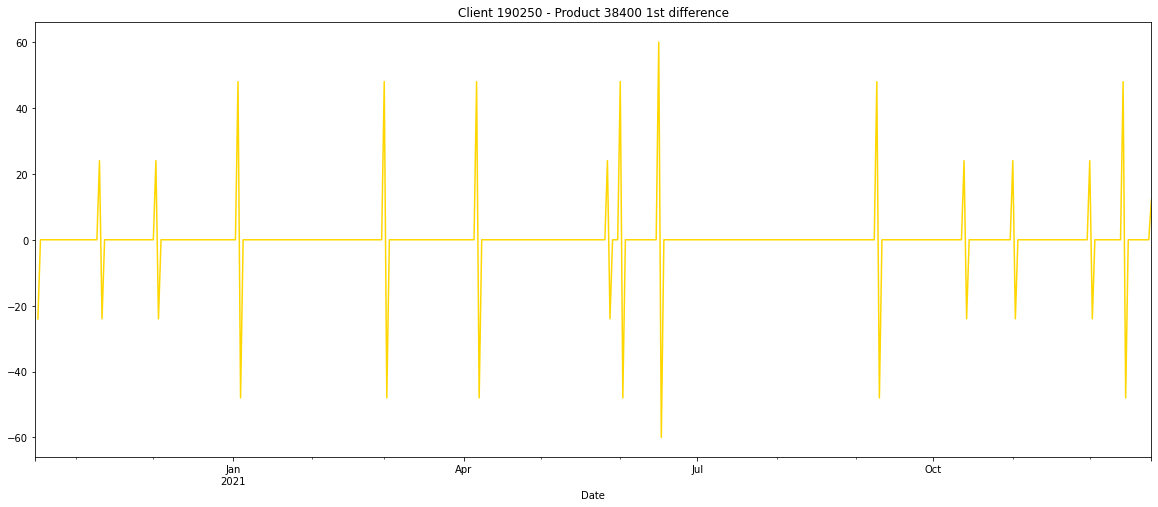

In [67]:
df_["1st diff"].plot(figsize= (20,8), color = "gold")
plt.title("Client 190250 - Product 38400 1st difference")
plt.show()

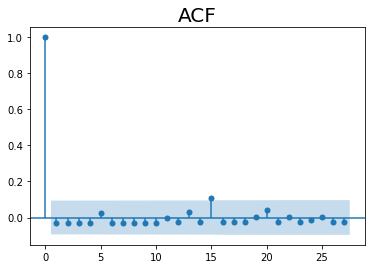

In [68]:
sgt.plot_acf(df_["Quantité"],alpha=0.05)
plt.title("ACF",size=20)
plt.show()

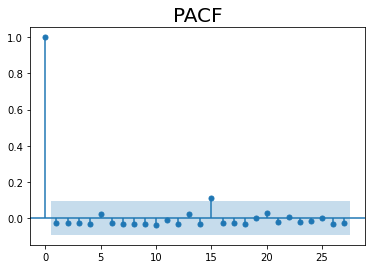

In [69]:
sgt.plot_pacf(df_["Quantité"],alpha=0.05)
plt.title("PACF",size=20)
plt.show()
#first and 15th lag are significant , we will consider the 15th but if AIC proves we can have same performance with less complexity we will abondon it

In [70]:
#fitting a simple ARIMAX (1,0,1) #no integration seems to be required since TS is assumed to be stationary
mod_cad_0=ARIMA(df_['1st diff']["2020-10-17":] , order=(1,0,1))
results_mod_cad_0 = mod_cad_0.fit()
results_mod_cad_0.summary()

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               1st diff   No. Observations:                  435
Model:                     ARMA(1, 1)   Log Likelihood               -1462.900
Method:                       css-mle   S.D. of innovations              6.938
Date:                Tue, 29 Mar 2022   AIC                           2933.801
Time:                        14:15:47   BIC                           2950.102
Sample:                    10-17-2020   HQIC                          2940.235
                         - 12-25-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0008      0.003      0.306      0.760      -0.004       0.006
ar.L1.1st diff    -0.0273      0.049     -0.562      0.574      -0.123       0.068
ma.L1.1st diff    -1.0000      0.006   -162.790      0.000      -1.012      -0.988
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -36.5708           +0.0000j           36.5708            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
# in the below picture we replace p by 1 and q by 1 , phi 1 is 1.0023 , theta 1 is -36.5708 with c=0 and no differencing
#running the cell above may give slightly different results , always consider Roots --> Real column for coefficients

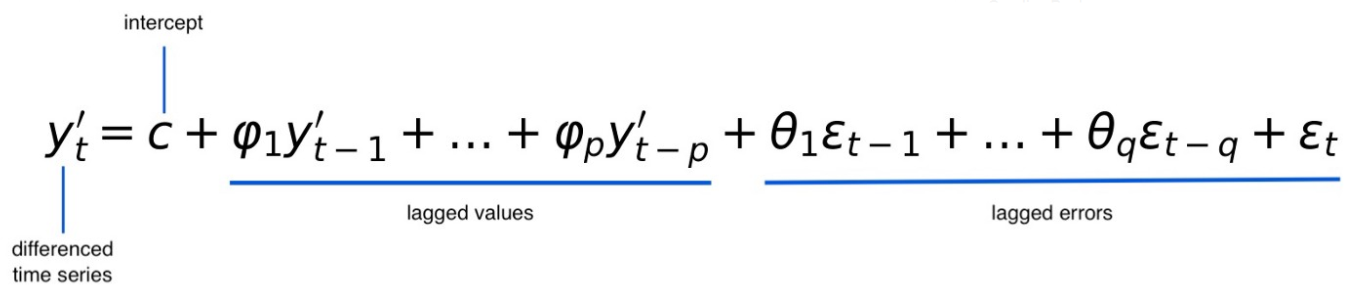

### Introducing an exogenous variable : scraped from google trends about the word "toux" in tunisia during the last 5 years fitted to our sampling start-end dates

In [72]:
#on générale on peut avoir un modéle plus expressif si on ajouter uen variable externe /exogéne 
#cette variable peut etre le resultat de sentiment analysis des commentaires twitter à propos de cette société
#comme elle peut etre une des séries temporelles d'autres produit
#on choisit d'ajouter la TS des recherches google du mot "toux" en tunisie durant les 5 ans [using google Trends]
df_exo=pd.read_csv("multiTimeline.csv",skiprows=lambda x: x in [0, 1])
df_exo=df_exo[(df_exo['Semaine'] >= start_date_str) & (df_exo['Semaine'] <= end_date_str)]
df_exo=df_exo.set_index(['Semaine'])
df_exo

,toux: (Tunisie)
Semaine,
2020-10-18,32
2020-10-25,43
2020-11-01,40
2020-11-08,34
2020-11-15,26
...,...
2021-11-21,37
2021-11-28,63
2021-12-05,29


In [73]:
df_aux=copy.deepcopy(df_exo)

In [74]:
#assigning the frequency 
df_aux=df_aux.asfreq('d') #daily frequency sundays and saturdays included
print(df_aux)
print(df_exo)

            toux: (Tunisie)
Semaine                    
2020-10-18              NaN
2020-10-19              NaN
2020-10-20              NaN
2020-10-21              NaN
2020-10-22              NaN
...                     ...
2021-12-15              NaN
2021-12-16              NaN
2021-12-17              NaN
2021-12-18              NaN
2021-12-19              NaN

[428 rows x 1 columns]
            toux: (Tunisie)
Semaine                    
2020-10-18               32
2020-10-25               43
2020-11-01               40
2020-11-08               34
2020-11-15               26
...                     ...
2021-11-21               37
2021-11-28               63
2021-12-05               29
2021-12-12               53
2021-12-19               38

[62 rows x 1 columns]


In [75]:
# Changing object type column to datetime
df_aux['date_col'] = pd.to_datetime(df_aux.index)

# Creating new column with just the date
df_aux['Semaine'] = df_aux['date_col'].dt.date
df_aux.index=df_aux['Semaine']
df_aux.drop(df_aux.iloc[:, 1:4], inplace = True, axis = 1)
df_aux

,toux: (Tunisie)
Semaine,
2020-10-18,NaN
2020-10-19,NaN
2020-10-20,NaN
2020-10-21,NaN
2020-10-22,NaN
...,...
2021-12-15,NaN
2021-12-16,NaN
2021-12-17,NaN


In [76]:
for i in range(len(df_aux.index)): #on essaye de re-remplir le DF par les donnés de chaque semaine et 0 sinon
    if df_aux.index[i] in df_exo.index:
        df_aux.at[df_aux.index[i],"toux: (Tunisie)"]=df_exo.at[df_aux.index[i],"toux: (Tunisie)"]
print(df_aux)
print(df_exo)

            toux: (Tunisie)
Semaine                    
2020-10-18              NaN
2020-10-19              NaN
2020-10-20              NaN
2020-10-21              NaN
2020-10-22              NaN
...                     ...
2021-12-15              NaN
2021-12-16              NaN
2021-12-17              NaN
2021-12-18              NaN
2021-12-19              NaN

[428 rows x 1 columns]
            toux: (Tunisie)
Semaine                    
2020-10-18               32
2020-10-25               43
2020-11-01               40
2020-11-08               34
2020-11-15               26
...                     ...
2021-11-21               37
2021-11-28               63
2021-12-05               29
2021-12-12               53
2021-12-19               38

[62 rows x 1 columns]


In [77]:
df_exo = df_exo.fillna(0)
df_exo #echec du remplissage

,toux: (Tunisie)
Semaine,
2020-10-18,32
2020-10-25,43
2020-11-01,40
2020-11-08,34
2020-11-15,26
...,...
2021-11-21,37
2021-11-28,63
2021-12-05,29


In [78]:
mod_Ex_0=ARIMA(df_["Quantité"] , exog =df_exo["toux: (Tunisie)"] , order=(1,0,1)) 
# il faut aligner l'intervale de la variable exogéne avec celui de la variable de la série temporelle 

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: The indices for endog and exog are not aligned

In [ ]:
#predict and plot

In [ ]:
#rmse and eval

### Using auto-arima

In [79]:
size = int(len(df["Quantité"])*0.8) #for in-sample predictions [we have too few of a number of observations]
df_.index[:size]#train dates
df_.index[size:]#test dates

DatetimeIndex(['2020-10-28', '2020-10-29', '2020-10-30', '2020-10-31',
               '2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06',
               ...
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-24', '2021-12-25'],
              dtype='datetime64[ns]', name='Date', length=424, freq='D')

In [81]:
model =auto_arima(df_["Quantité"][:size],
                    trace=True,
                    suppress_warnings=True,
                    max_p=12,max_q=2,max_order=14,
                    stepwise=True,
                    Seasonal =False)
#plusieurs paramétres peuvent etre ajouter , visiter dossier OLD pour voir l'usage d'auto arima avec des différents critéres d'informations

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=83.465, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85.458, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=85.454, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=82.509, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=86.754, Time=0.14 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.232 seconds


In [82]:
model.summary() #resumé du modéle , la qualité se vérifie de Log likelihood AIC  BIC
                #nom et famile du modéle et ordre p,d,q dans Model
                #coefficients comme sigma 2 qui ont une P>|z| >0.05 sera incorporés

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   12
Model:                        SARIMAX   Log Likelihood                 -40.254
Date:                Tue, 29 Mar 2022   AIC                             82.509
Time:                        14:18:52   BIC                             82.994
Sample:                             0   HQIC                            82.329
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        48.0000      8.356      5.745      0.000      31.623      64.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                             3.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
test_pred,confint=model.predict( #prédiction
    n_periods=len(df_.index[size:])
    ,return_coef_int=True) #erreur 
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(df_.index[size:],df_["Quantité"][size:],label='data')#all data
ax.plot(df_.index[size:],test_pred,label='forecast')#alignement with prediction
ax.fill_between(df_.index[size:], \ #visualisation de l'intervale de confiance de la prédiction
                confint[:,0],confint[:,0], \
               color='red',alpha=0.3)
ax.legend();

ValueError: too many values to unpack (expected 2)

In [ ]:
train_pred=model.predict_in_sample(start=1,end=-1) #visualisation data +train+test+conf intervals sur meme graphe
fig,ax =plt.subplots(figsize=(10,5))
ax.plot(df_.index,df_["Quantité"],label='data')
ax.plot(df_.index[1:size],df_["Quantité"][size:],label='data')
ax.plot(df_.index[size:],test_pred,label='forecast')
ax.fill_between(df_.index[size:], \
                confint[:,0],confint[:,0], \
               color='red',alpha=0.3)
ax.legend();

In [ ]:
#create rmse()


In [ ]:
def LLR_test(mod_1, mod_2, DF = 1): #for comparing different arima models 
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p
#test log likelihood resemblance

In [ ]:
#instead of all this ,fit a linear model with confidence interval

In [90]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df.index, df["Quantité"])

ValueError: could not convert string to float: '2020-10-16'

In [ ]:
reg.score(X, y)

In [ ]:
reg.coef_
reg.intercept_
reg.predict()

In [ ]:
#Trash was used :

In [ ]:
#correlation and Exogenous
print('Correlation among currency conversion rates from ' + str(start_date) + ' to ' + str(CAD_rc)+ '\n')
print('AUD_USD and AUD_GBP correlation: \t'+ str(df_new['AUD_USD'][start_date:CAD_rc].corr(df_new['AUD_GBP'][start_date:CAD_rc])))
print('AUD_GBP and AUD_CAD correlation: \t'+ str(df_new['AUD_GBP'][start_date:CAD_rc].corr(df_new['AUD_CAD'][start_date:CAD_rc])))

In [ ]:
##exogenous variables split
df_new_train['AUD_USD'], df_new_test['AUD_USD'] = df_new['AUD_USD'].iloc[:size], df_new['AUD_USD'].iloc[size:]
df_new_train['AUD_GBP'], df_new_test['AUD_GBP'] = df_new['AUD_GBP'].iloc[:size], df_new['AUD_GBP'].iloc[size:]